In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

data = pd.read_csv('svm.csv')

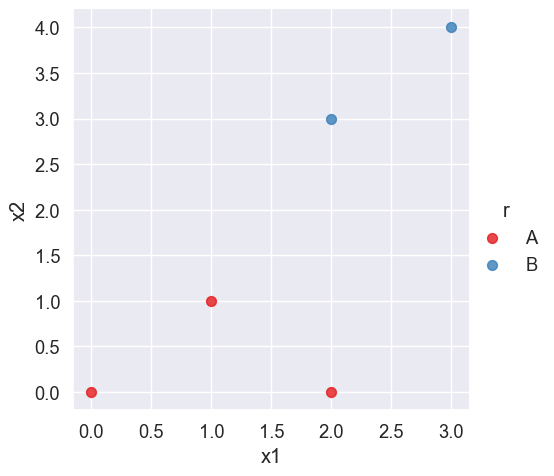

In [13]:
# Create a scatter plot of 'x1 against 'x2', coloring the points based on
# the 'r' column (label in the dataset), without fitting a regression line,
# and with larger sized data points.

sns.lmplot(x='x1', y='x2',
           data=data,
           hue='r',
           palette='Set1', # set of distinct colors optimised for labels
           fit_reg=False,
           scatter_kws={"s":50})
plt.show()


In [15]:
from sklearn import svm
#--converting the columns as matrices--
points = data[['x1','x2']].values
result = data['r']

clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
      np.abs(clf.dual_coef_))

Vector of weights (w) =  [0.4 0.8]
b =  -2.2
Indices of support vectors =  [1 2]
Support vectors =  [[1. 1.]
 [2. 3.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.4 0.4]]


## Plotting the Hyperplane and the Margins

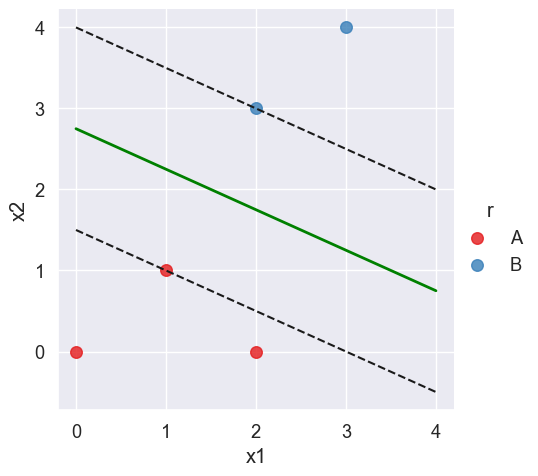

In [23]:
#--w is the vector of weights---
w = clf.coef_[0]

#---find the slope of the hyperplane ---
slope = -w[0] / w[1]

b= clf.intercept_[0]

#---find the coordinates for the hyperplane ---
xx = np.linspace(0,4)
yy = slope * xx - (b / w[1])

#--plot the margins--
s = clf.support_vectors_[0]  #---first support vector---
yy_down = slope * xx + (s[1] - slope * s[0])

s = clf.support_vectors_[-1] #-- last support vector ---
yy_up = slope * xx + (s[1] - slope * s[0])

#-- plot the points --
sns.lmplot(x='x1', y='x2', data=data, hue='r', palette='Set1', fit_reg=False, scatter_kws={"s":70})

#--plot the hyperplane---
plt.plot(xx, yy, linewidth=2, color='green');

#---plot the 2 margins---
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.show()

## Making Predictions

In [28]:
print(clf.predict([[3,3]])[0])  #'B'
print(clf.predict([[4,0]])[0])   #'A'
print(clf.predict([[2,2]])[0])   #'B'
print(clf.predict([[1,2]])[0])   #'A'

B
A
B
A


## Types of Kernels

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn import svm, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(iris.data[0:5])         #print first 5 rows
print(iris.feature_names)     #['sepal lenght (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
print(iris.target[0:5])       # print first 5 rows
print(iris.target_names)      #['setosa' 'versicolor' 'virginica']

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


In [41]:
X = iris.data[:, :2]  #Take the first two features
y = iris.target

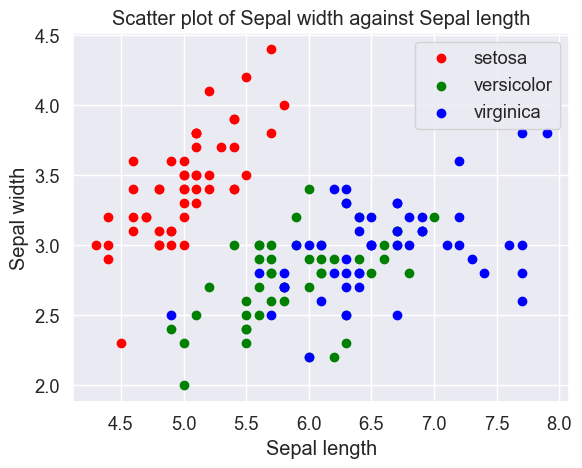

In [43]:
#--- plot the points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

In [47]:
C = 1 #SVM regularization parameter (controls the trade-off between maximizing the margin and minimizing the classification error.)
#C = 10**(-10)
clf = svm.SVC(kernel='linear', C=C).fit(X,y)
title = 'SVC with linear kernel'

In [49]:
#--- min and max for the first feature---
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1

#--- min and max for the second feature---